In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("/content/sales_data.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [ ]:
df.shape

(1000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6    Price                   1000 non-null   float64
 7   Quantity                 970 non-null    float64
 8   Tax 5%                   930 non-null    float64
 9   Total                    960 non-null    float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     940 non-null    float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour
count,1000.000000,970.000000,930.000000,960.000000,940.000000,9.500000e+02,970.000000,950.000000,1000.000000
mean,55.672130,5.470103,15.277358,322.283730,307.461596,4.761905e+00,15.286852,6.958316,14.910000
std,26.494628,2.919214,11.714366,245.425686,235.119773,8.886463e-16,11.653501,1.722965,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000,10.000000
25%,32.875000,3.000000,5.793250,124.422375,116.430000,4.761905e+00,5.960500,5.500000,12.000000
50%,55.230000,5.000000,12.024000,253.596000,241.320000,4.761905e+00,12.042000,6.900000,15.000000
75%,77.935000,8.000000,22.428000,470.998500,452.422500,4.761905e+00,22.402250,8.500000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000,20.000000


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', ' Price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Hour'],
      dtype='object')

In [ ]:
df.rename(columns={' Price': 'Unit Price'}, inplace=True)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit Price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hour'],
      dtype='object')

In [ ]:
print(df['Invoice ID'].duplicated().sum())

0


In [ ]:
df['Customer type'].nunique()

2

In [ ]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [ ]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [ ]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type               0
Gender                      0
Product line                0
Unit Price                  0
Quantity                   30
Tax 5%                     70
Total                      40
Date                        0
Time                        0
Payment                     0
cogs                       60
gross margin percentage    50
gross income               30
Rating                     50
Hour                        0
dtype: int64

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

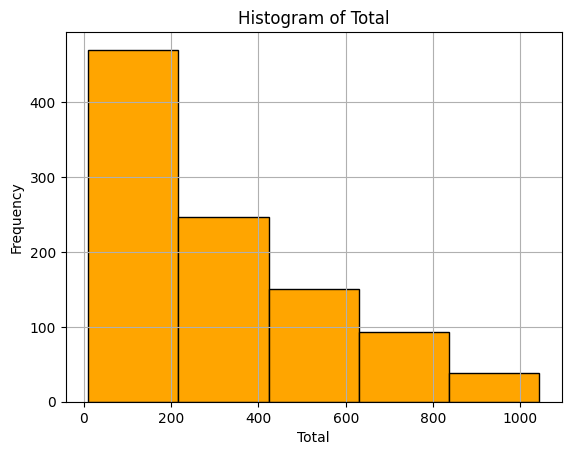

In [ ]:
column_name = 'Total'

# Plot the histogram
plt.hist(df[column_name], bins=5, color='orange', edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.grid(True)
plt.show()

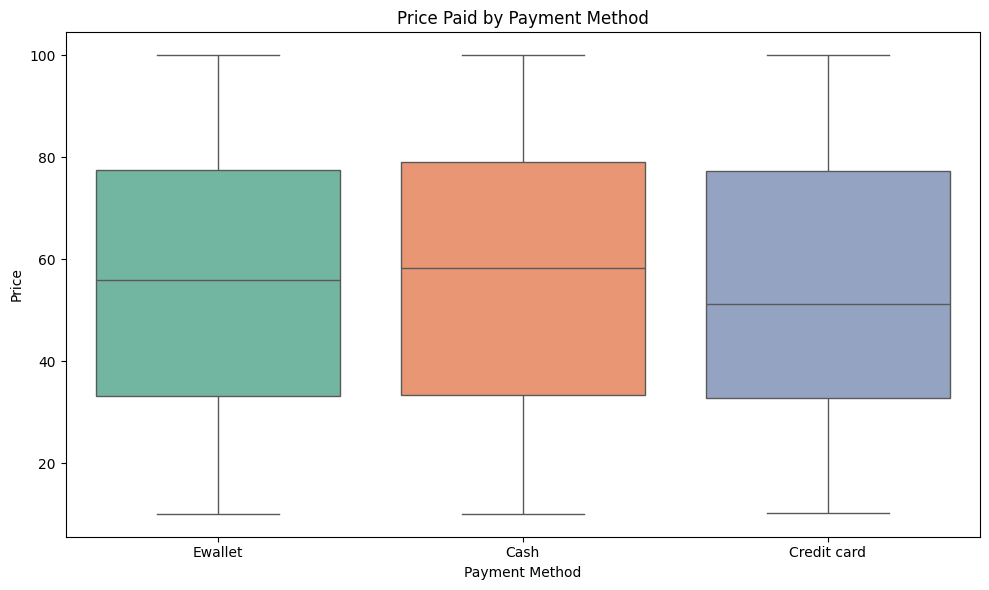

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Payment', y='Unit Price', palette='Set2')
plt.title('Price Paid by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

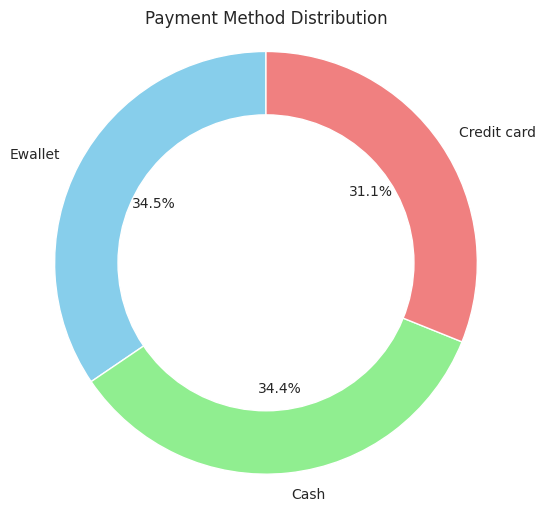

In [ ]:
payment_counts = df['Payment'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Payment Method Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

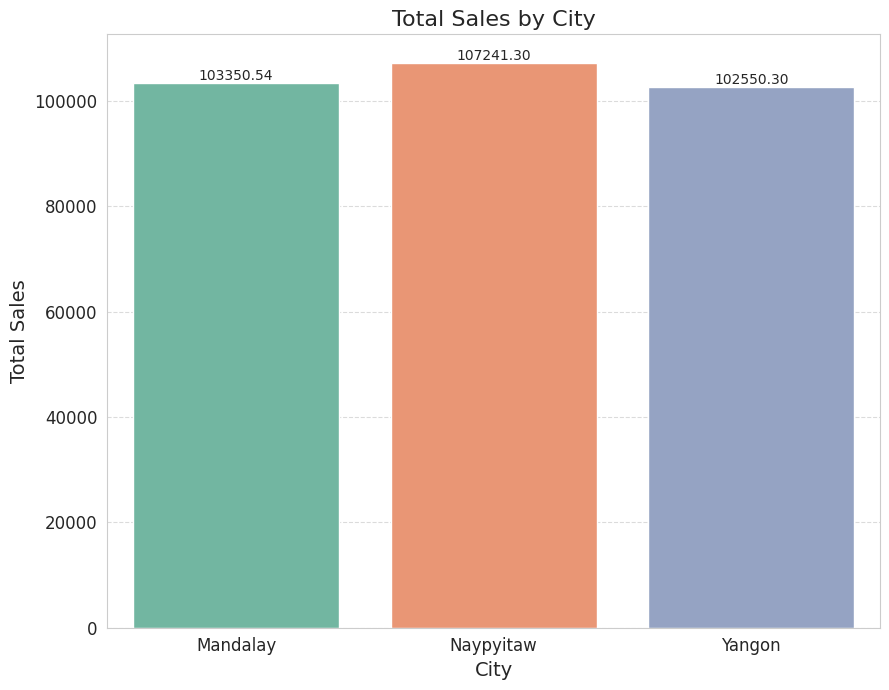

In [ ]:
# Calculate total sales for each city
city_sales = df.groupby('City')['Total'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(9, 7))
sns.barplot(data=city_sales, x='City', y='Total', palette='Set2')

# Add title and labels with custom font sizes
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 5),
                 textcoords = 'offset points')

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

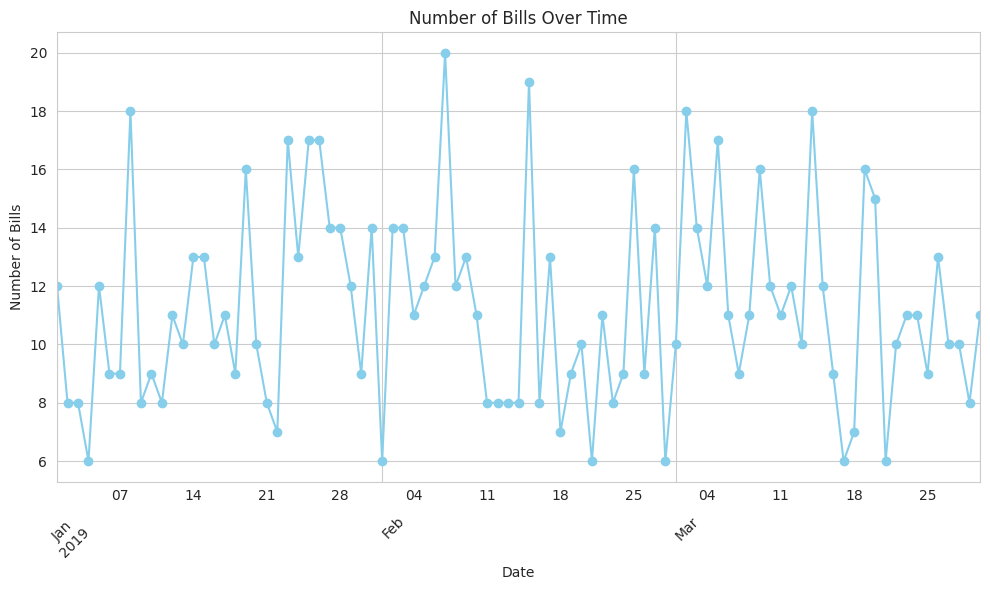

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Count the number of bills for each date
bill_counts = df['Date'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
bill_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bills')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

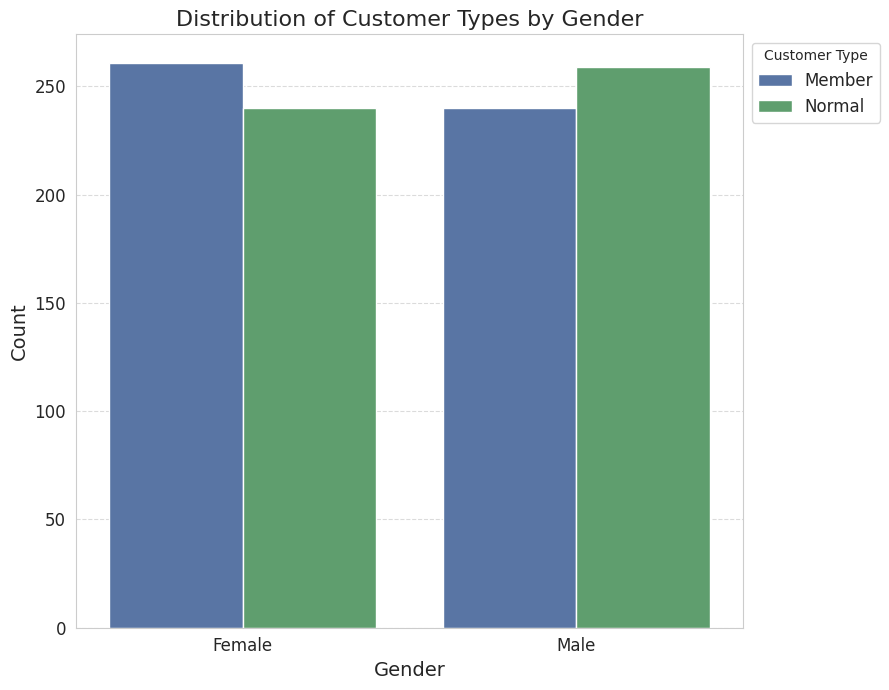

In [ ]:
# Define custom colors for the plot
colors = ['#4c72b0', '#55a868']

# Set the style
sns.set_style("whitegrid")

# Plot the count plot
plt.figure(figsize=(9, 7))
sns.countplot(data=df, x='Gender', hue='Customer type', palette=colors)

# Add title and labels with custom font sizes
plt.title('Distribution of Customer Types by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize legend title and font size
plt.legend(title='Customer Type', fontsize=12, bbox_to_anchor=(1, 1))

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

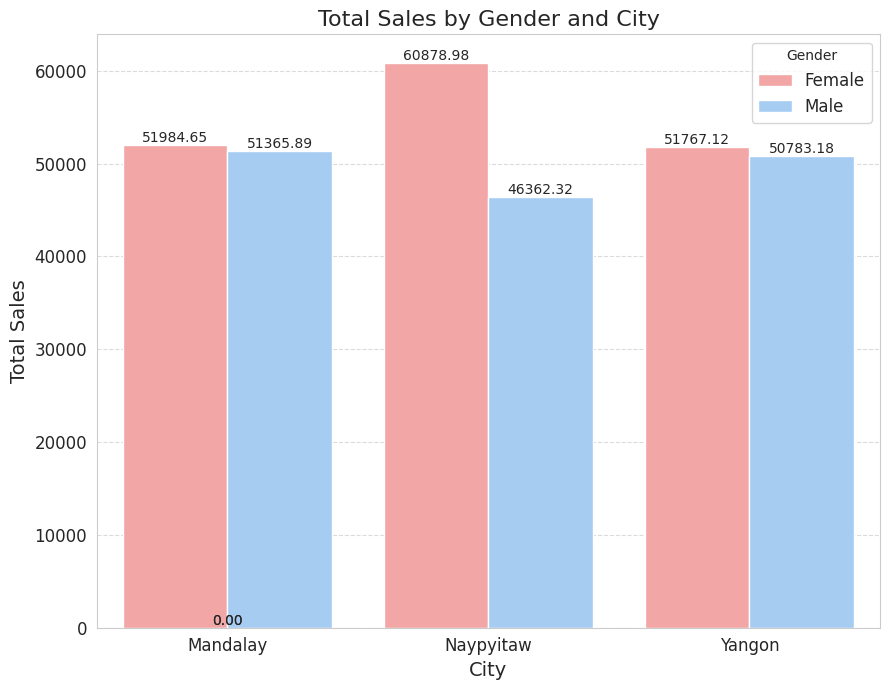

In [ ]:
# Calculate total sales for each gender in each city
gender_city_sales = df.groupby(['City', 'Gender'])['Total'].sum().reset_index()

# Define custom colors for females and males
colors = {'Female': '#FF9999', 'Male': '#99CCFF'}

# Plot the bar plot
plt.figure(figsize=(9, 7))
barplot = sns.barplot(data=gender_city_sales, x='City', y='Total', hue='Gender', palette=colors)

# Add title and labels with custom font sizes
plt.title('Total Sales by Gender and City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Customize legend title and font size
plt.legend(title='Gender', fontsize=12)

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

# Show plot
plt.tight_layout()
plt.show()

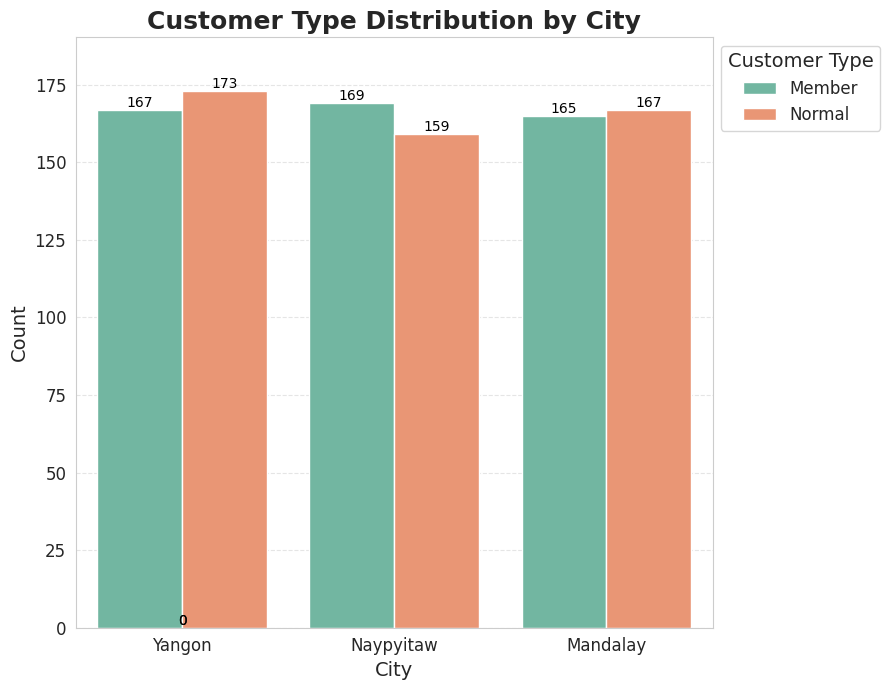

In [ ]:
# Set custom colors for the plot
colors = ['#66c2a5', '#fc8d62']  # Greenish for Member, Orange for Normal

# Set the style
sns.set_style("whitegrid")

# Plot the count plot
plt.figure(figsize=(9, 7))
sns.countplot(data=df, x='City', hue='Customer type', palette=colors)

# Add title and labels with custom font sizes
plt.title('Customer Type Distribution by City', fontsize=18, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize legend title and font size
plt.legend(title='Customer Type', fontsize=12, title_fontsize='14', bbox_to_anchor=(1, 1))

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add annotations to show counts on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Adjust plot margins
plt.margins(y=0.1)

# Show plot
plt.tight_layout()
plt.show()

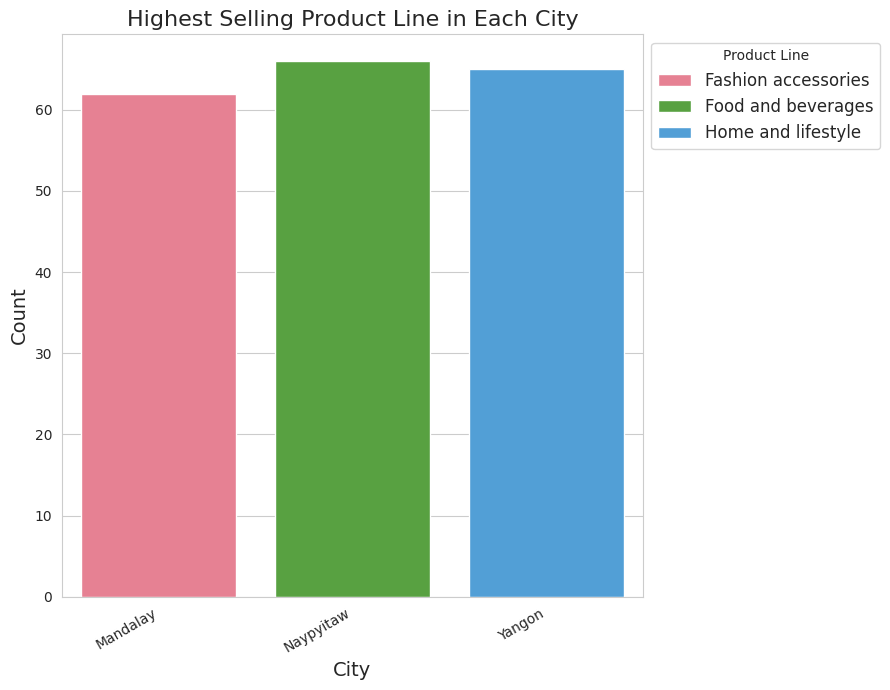

In [ ]:
# Set the style
sns.set_style("whitegrid")

# Group the data by 'City' and 'Product line', and count the occurrences
city_product_counts = df.groupby(['City', 'Product line']).size().reset_index(name='count')

# Find the highest product line in each city
highest_product_in_city = city_product_counts.loc[city_product_counts.groupby('City')['count'].idxmax()]

# Set the figure size and plot the bar chart
plt.figure(figsize=(9, 7))
sns.barplot(data=highest_product_in_city, x='City', y='count', hue='Product line', palette='husl')

# Add title and labels
plt.title('Highest Selling Product Line in Each City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust legend position and title
plt.legend(title='Product Line', loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right')

# Show plot
plt.tight_layout()
plt.show()

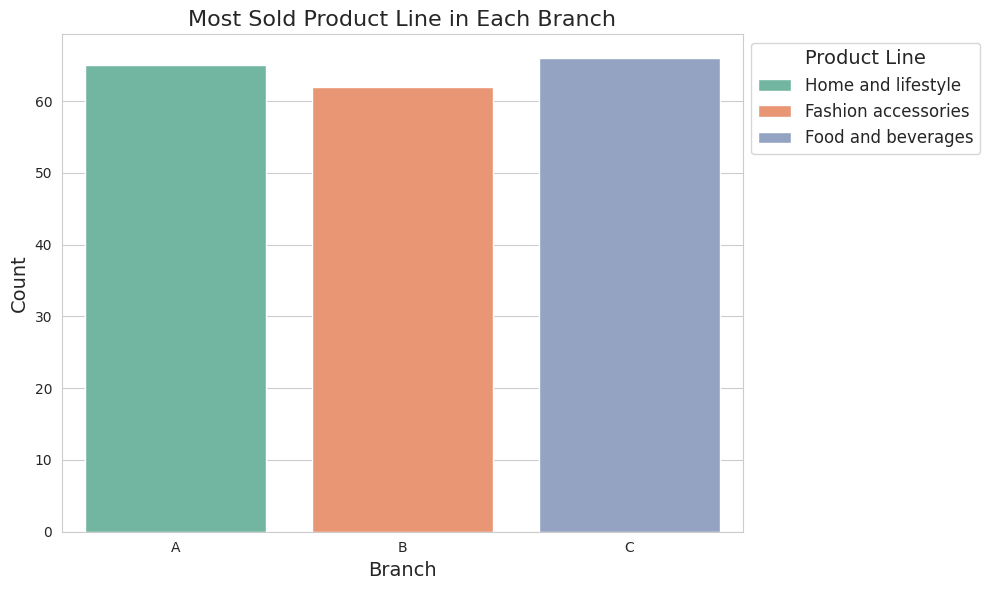

In [ ]:
# Group the data by 'Branch' and 'Product line', and count the occurrences
branch_product_counts = df.groupby(['Branch', 'Product line']).size().reset_index(name='count')

# Find the most sold product line in each branch
most_sold_product_in_branch = branch_product_counts.loc[branch_product_counts.groupby('Branch')['count'].idxmax()]

# Set custom colors for the plot
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Example colors for each product line

# Set the style
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=most_sold_product_in_branch, x='Branch', y='count', hue='Product line', palette=colors)

# Add title and labels
plt.title('Most Sold Product Line in Each Branch', fontsize=16)
plt.xlabel('Branch', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize legend title and font size
plt.legend(title='Product Line', fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Define a function to categorize ratings
def categorize_rating(rating):
    if rating <= 4:
        return 'Dissatisfied'
    elif rating >= 7:
        return 'Satisfied'
    else:
        return 'Neutral'

# Apply the function to create the new 'Satisfaction' column
df['Satisfaction'] = df['Rating'].apply(lambda x: categorize_rating(x))


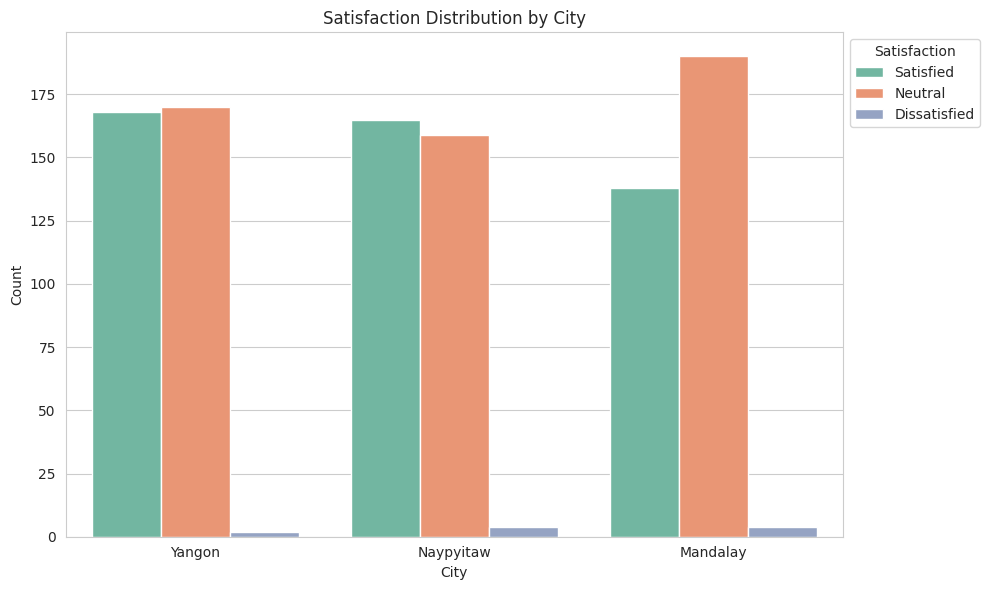

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', hue='Satisfaction', palette='Set2')
plt.title('Satisfaction Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Satisfaction', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


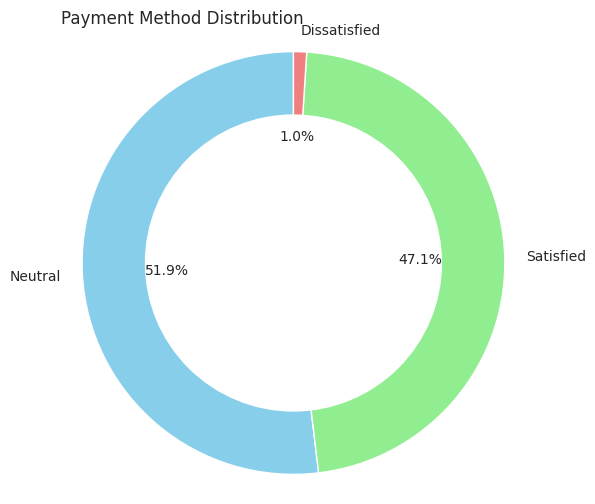

In [ ]:
satisfaction_counts = df['Satisfaction'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Satisfaction Distribution', loc='left')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

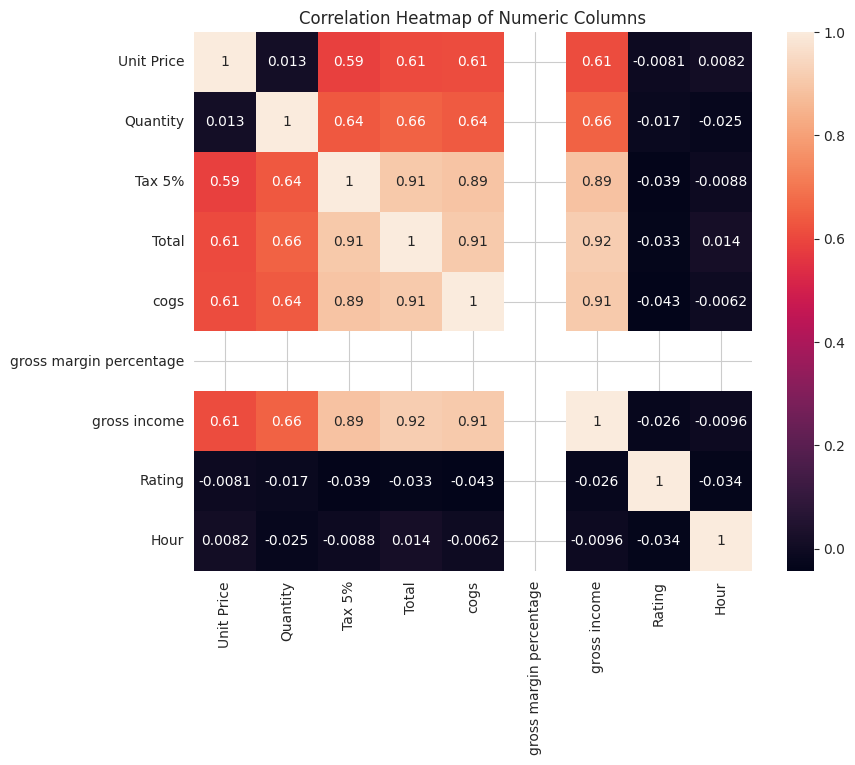

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of the correlations between numeric columns
plt.figure(figsize=(9, 7))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


In [ ]:
list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit Price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Satisfaction
0,814,0,2,0,0,3,74.69,7.0,26.1415,548.9715,2019-01-05,146,2,522.83,4.761905,26.1415,9.1,13,2
1,142,2,1,1,0,0,15.28,5.0,3.8200,80.2200,2019-03-08,23,0,76.40,4.761905,3.8200,9.6,10,2
2,653,0,2,1,1,4,46.33,7.0,16.2155,340.5255,2019-03-03,155,1,324.31,4.761905,16.2155,7.4,13,2
3,18,0,2,0,1,3,58.22,8.0,23.2880,489.0480,2019-01-27,485,2,465.76,4.761905,23.2880,8.4,20,2
4,339,0,2,1,1,5,86.31,7.0,30.2085,634.3785,2019-02-08,29,2,604.17,4.761905,30.2085,5.3,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1.0,4.1540,42.3675,2019-01-29,174,2,40.35,4.761905,2.0175,6.2,13,1
996,250,1,0,1,0,4,97.38,10.0,48.6900,1022.4900,2019-03-02,342,2,973.80,4.761905,48.6900,4.4,17,1
997,767,0,2,0,1,2,31.84,1.0,1.5920,33.4320,2019-02-09,154,0,31.84,4.761905,1.5920,7.7,13,2
998,308,0,2,1,1,4,65.82,1.0,3.2910,69.1110,2019-02-22,261,0,65.82,4.761905,3.2910,4.1,15,1


In [ ]:


from sklearn.metrics import classification_report, confusion_matrix

# Define the list of datetime columns
datetime_columns = ['Date', 'Time']

# Drop datetime columns from the dataset
x = df.drop(['Gender'] + datetime_columns, axis=1)
y = df['Gender']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_classifier.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn_classifier.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.45      0.44      0.45       100
           1       0.46      0.47      0.46       100

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.46      0.45       200

Confusion Matrix:
 [[44 56]
 [53 47]]
Training Score:
 68.0


In [ ]:

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier using the training data
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt_classifier.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dt_classifier.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56       100
           1       0.56      0.58      0.57       100

    accuracy                           0.56       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200

Confusion Matrix:
 [[55 45]
 [42 58]]
Training Score:
 100.0
